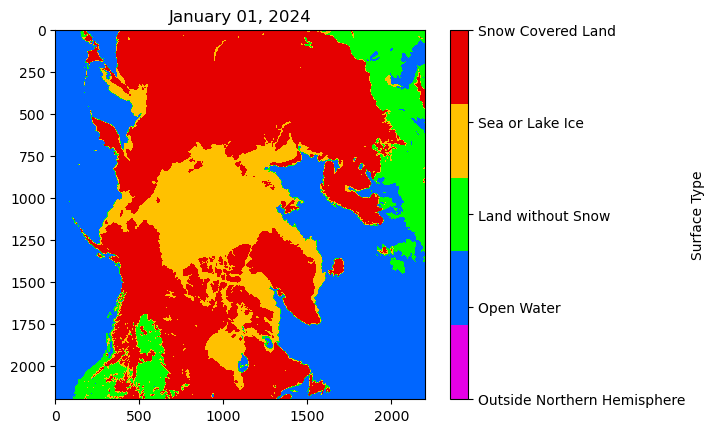

In [65]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from datetime import datetime

# Open the HDF file in read mode
with h5py.File('ims2024001_4km_v1.3.nc', 'r') as file:
    # Set the date
    dataset = file['time']
    timestamp = dataset[0]
    dt_object = datetime.utcfromtimestamp(timestamp)
    formatted_date = dt_object.strftime("%B %d, %Y")
    
    
    # Image array
    dataset = file['IMS_Surface_Values']
    data = dataset[()]
    rotated_data = np.rot90(data[0], 2)

    # Define a custom colormap with five colors
    """
    0 (outside Northern Hemisphere).
    1 (open water)
    2 (land without snow)
    3 (sea or lake ice)
    4 (snow covered land)
    """
    colors = ['#E500E5', '#0066FF', '#01FF00', '#FFC100', '#E50000']
    cmap = ListedColormap(colors, name='custom_colormap', N=len(colors))
    
    inner_level = 2200
    # Select the inner portion of the rotated data
    start_row = (rotated_data.shape[0] - inner_level) // 2
    end_row = start_row + inner_level
    start_col = (rotated_data.shape[1] - inner_level) // 2
    end_col = start_col + inner_level
    inner_data = rotated_data[start_row:end_row, start_col:end_col]

    # Flip to match mapo on PolarWatch website
    flipped_data = np.fliplr(inner_data)
    
    # Display the image using imshow with the custom colormap
    plt.imshow(flipped_data, cmap=cmap, vmin=0, vmax=len(colors) - 1)
    plt.title(f'{formatted_date}')
    colorbar = plt.colorbar(ticks=np.arange(len(colors)), label='Surface Type')
    colorbar.set_ticklabels(['Outside Northern Hemisphere', 'Open Water', 'Land without Snow', 'Sea or Lake Ice', 'Snow Covered Land'])

    plt.show()